## GAM

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from pygam import LinearGAM, LogisticGAM

In [8]:
data = pd.read_csv('/Users/Bakso/Documents/git/604Final/data/daily_data.csv')
data.dropna(inplace = True)

data['day_of_month'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year

data.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year
0,72202,2013-11-22,26.7,25.957143,24.4,True,False,22,11,2013
1,72202,2013-11-23,27.2,25.033333,23.9,True,False,23,11,2013
2,72202,2013-11-24,28.3,24.620833,21.7,False,False,24,11,2013
3,72202,2013-11-25,25.6,23.179167,21.7,True,False,25,11,2013
4,72202,2013-11-26,27.2,25.016667,22.8,True,False,26,11,2013


In [39]:
data1 = data.iloc[1:].reset_index(drop=True)

# Add 5 columns for yesterday's weather: 'yest_temp_max', 'yest_temp_mean', 'yest_temp_min', 'yest_rainfall', 'yest_snow'
data1['yest_temp_max'] = data['temp_max'].shift(1)[1:].reset_index(drop=True)
data1['yest_temp_mean'] = data['temp_mean'].shift(1)[1:].reset_index(drop=True)
data1['yest_temp_min'] = data['temp_min'].shift(1)[1:].reset_index(drop=True)
data1['yest_rainfall'] = data['rainfall'].shift(1)[1:].reset_index(drop=True)
data1['yest_snow'] = data['snow'].shift(1)[1:].reset_index(drop=True)

# Display the modified dataframe
data1.head()

,station,date,temp_max,temp_mean,temp_min,rainfall,snow,day_of_month,month,year,yest_temp_max,yest_temp_mean,yest_temp_min,yest_rainfall,yest_snow
0,72202,2013-11-23,27.2,25.033333,23.9,True,False,23,11,2013,26.7,25.957143,24.4,True,False
1,72202,2013-11-24,28.3,24.620833,21.7,False,False,24,11,2013,27.2,25.033333,23.9,True,False
2,72202,2013-11-25,25.6,23.179167,21.7,True,False,25,11,2013,28.3,24.620833,21.7,False,False
3,72202,2013-11-26,27.2,25.016667,22.8,True,False,26,11,2013,25.6,23.179167,21.7,True,False
4,72202,2013-11-27,26.1,24.012500,21.7,True,False,27,11,2013,27.2,25.016667,22.8,True,False


### Mean Temp Model 

In [79]:
test_size = 10
data1['station'] = data1['station'].astype('category', copy=True).cat.codes
train_data = data1[:-test_size]
test_data = data1[-test_size:]

y = train_data['temp_mean']
X = train_data[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
X_test = test_data[['day_of_month', 'month', 'year', 'yest_temp_mean', 'station']]
y_test = test_data['temp_mean']

In [50]:
gam = LinearGAM().fit(X,y)

In [51]:
predictions = gam.predict(X_test)

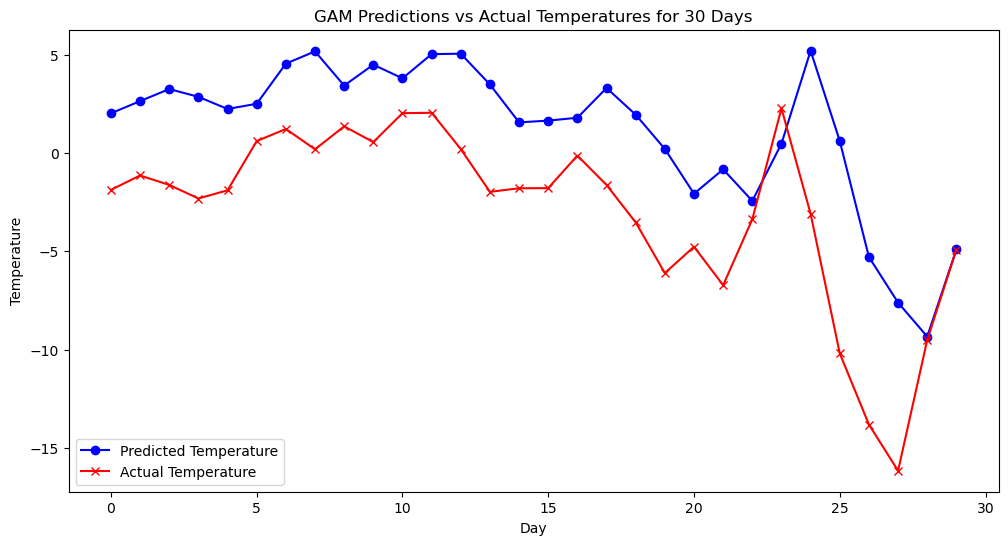

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted Temperature', color='blue', marker='o')
plt.plot(y_test.values, label='Actual Temperature', color='red', marker='x')
plt.title('GAM Predictions vs Actual Temperatures for 30 Days')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(np.array(y_test), predictions))
rmse

4.900263114045378

In [ ]:
pdeps,confi = gam.partial_dependence(term =1 ,width=0.95)

plt.figure(figsize=(10, 6))
plt.plot(X_test.iloc[:,1], pdeps, color='blue', lw=2)
plt.fill_between(X_test.iloc[:,1], confi[:, 0], confi[:, 1], color='blue', alpha=0.2)
plt.title('Partial Dependence Plot for term 1')
plt.xlabel('Feature value')
plt.ylabel('Partial dependence')
plt.show()


## Snow 

In [80]:
ys = train_data['snow']
Xs = train_data[['day_of_month', 'month', 'year', 'yest_snow', 'station']]
Xs_test = test_data[['day_of_month', 'month', 'year', 'yest_snow', 'station']]
ys_test = test_data['snow'].astype(int)

In [81]:
gam_snow = LogisticGAM().fit(Xs, ys)

In [90]:
snow_pred = (gam_snow.predict(Xs_test)>0.5).astype(int)

In [91]:
snow_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
accuracy = np.mean(snow_pred == ys_test)
accuracy

0.5

## Rain

In [86]:
yr = train_data['rainfall']
Xr = train_data[['day_of_month', 'month', 'year', 'yest_rainfall', 'station']]
Xr_test = test_data[['day_of_month', 'month', 'year', 'yest_rainfall', 'station']]
yr_test = test_data['rainfall'].astype(int)

In [87]:
gam_rain = LogisticGAM().fit(Xr, yr)

In [88]:
rain_pred = (gam_rain.predict(Xr_test)>0.5).astype(int)

In [89]:
accuracy = np.mean(rain_pred == yr_test)
accuracy

0.5